In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path = '/content/Supply chain logisitcs problem(original).xlsx'  # Change this to your uploaded file path
xls = pd.ExcelFile(file_path)

In [3]:
# Load the relevant sheets
order_list_df = pd.read_excel(xls, sheet_name='OrderList')
freight_rates_df = pd.read_excel(xls, sheet_name='FreightRates')

In [4]:
# Display the data for verification
print("Order List:")
print(order_list_df.head())

Order List:
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09       

In [ ]:
# Display the data for verification
print("\nFreight Rates:")
print(freight_rates_df.head())


Freight Rates:
  Carrier orig_port_cd dest_port_cd  minm_wgh_qty  max_wgh_qty svc_cd  \
0  V444_6       PORT08       PORT09         250.0       499.99    DTD   
1  V444_6       PORT08       PORT09          65.0        69.99    DTD   
2  V444_6       PORT08       PORT09          60.0        64.99    DTD   
3  V444_6       PORT08       PORT09          50.0        54.99    DTD   
4  V444_6       PORT08       PORT09          35.0        39.99    DTD   

   minimum cost    rate mode_dsc  tpt_day_cnt Carrier type  
0       43.2272  0.7132   AIR               2  V88888888_0  
1       43.2272  0.7512   AIR               2  V88888888_0  
2       43.2272  0.7892   AIR               2  V88888888_0  
3       43.2272  0.8272   AIR               2  V88888888_0  
4       43.2272  1.0552   AIR               2  V88888888_0  


In [ ]:
# Step 4: Inspect the column names to identify discrepancies
print("\nOrder List Columns:")
print(order_list_df.columns)


Order List Columns:
Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


In [ ]:
# Step 5: Strip whitespace from column names (if necessary)
order_list_df.columns = order_list_df.columns.str.strip()

In [ ]:
order_list_df.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [ ]:
# Verify if the 'carrier' column exists
print("\nUpdated Order List Columns:")
print(order_list_df.columns)



Updated Order List Columns:
Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


In [ ]:
# Step 6: Identify and Handle Discontinued Carrier
# Check for occurrences of V44_3 in the OrderList
if 'Carrier' in order_list_df.columns:
    v44_3_orders = order_list_df[order_list_df['Carrier'] == 'V44_3']
else:
    v44_3_orders = order_list_df[order_list_df['carrier'] == 'V44_3']  # Case insensitive check

print("\nOrders with V44_3:")
print(v44_3_orders)



Orders with V44_3:
         Order ID Order Date Origin Port Carrier  TPT Service Level  \
0    1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1    1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2    1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3    1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4    1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
..            ...        ...         ...     ...  ...           ...   
849  1.447237e+09 2013-05-26      PORT04   V44_3    0           CRF   
850  1.447329e+09 2013-05-26      PORT04   V44_3    0           CRF   
851  1.447329e+09 2013-05-26      PORT04   V44_3    0           CRF   
852  1.447306e+09 2013-05-26      PORT04   V44_3    2           CRF   
853  1.447391e+09 2013-05-26      PORT05   V44_3    2           CRF   

     Ship ahead day count  Ship Late Day count     Customer  Product ID  \
0                       3                    0    V5

In [ ]:
# Handling the discontinued carrier
# Here, we can mark or remove these orders
# For this example, we will create a new column to flag them
order_list_df['Discontinued Carrier'] = order_list_df['Carrier'].apply(lambda x: 'Yes' if x == 'V44_3' else 'No')

In [ ]:
# Step 6: Communicate Changes
# You can create a list of affected customers or orders to communicate the changes
affected_customers = v44_3_orders['Customer'].unique()  # Adjust to the correct casing
print("\nAffected Customers:")
print(affected_customers)


Affected Customers:
['V55555_53' 'V555555555555555_29' 'V5555555_30' 'V55555_2'
 'V555555555555_31' 'V55555555_32' 'V5555555_12']


In [ ]:
# Step 7: Check Data Integrity
# Verify the updated data
print("\nUpdated Order List:")
print(order_list_df.head())



Updated Order List:
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight Discontinued Carrier  
0    PLANT16           PORT09            808   14.30         

In [ ]:
# Step 8: Output Results
# Save the updated Order List to a new Excel file
output_file_path = '/content/Updated_Order_List.xlsx'
order_list_df.to_excel(output_file_path, index=False)
print(f"\nUpdated Order List saved to: {output_file_path}")


Updated Order List saved to: /content/Updated_Order_List.xlsx


# **Visualisation **

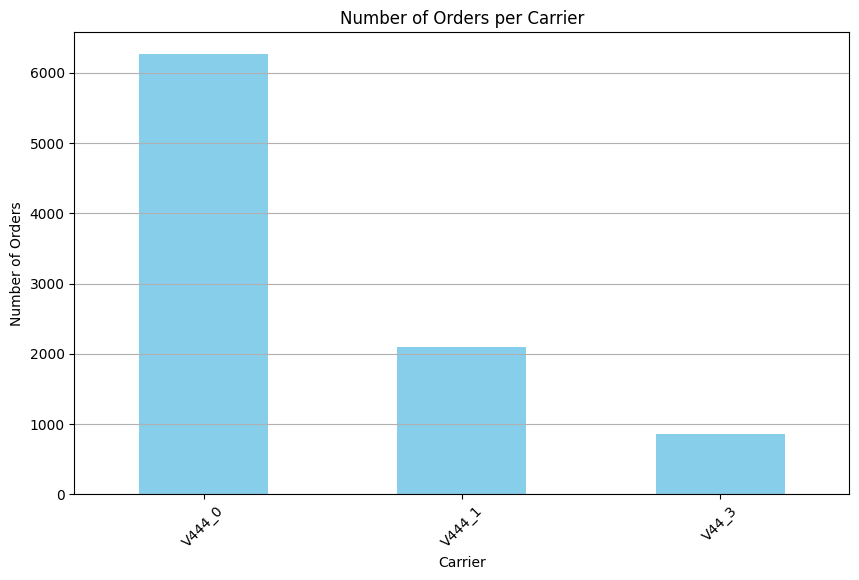

In [ ]:
# Step 2: Visualization 1 - Bar Chart: Number of Orders per Carrier
plt.figure(figsize=(10, 6))
order_list_df['Carrier'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


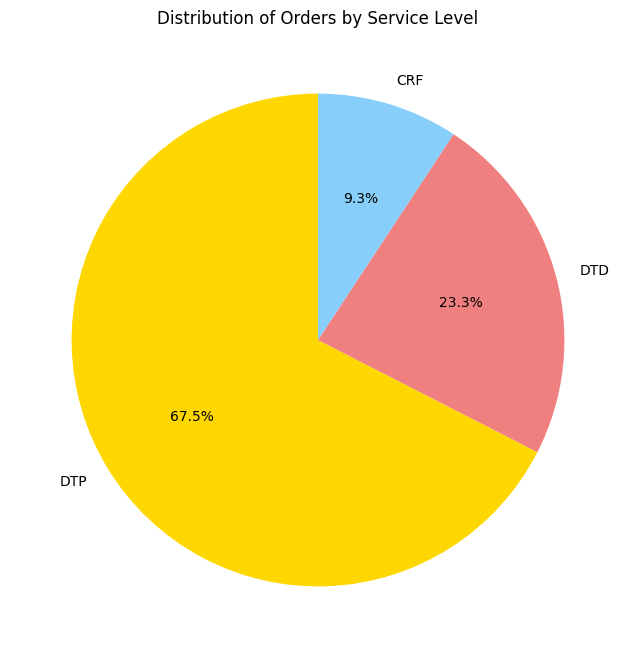

In [ ]:
# Step 3: Visualization 2 - Pie Chart: Distribution of Orders by Service Level
plt.figure(figsize=(8, 8))
order_list_df['Service Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Orders by Service Level')
plt.ylabel('')  # Remove y-label for better aesthetics
plt.show()

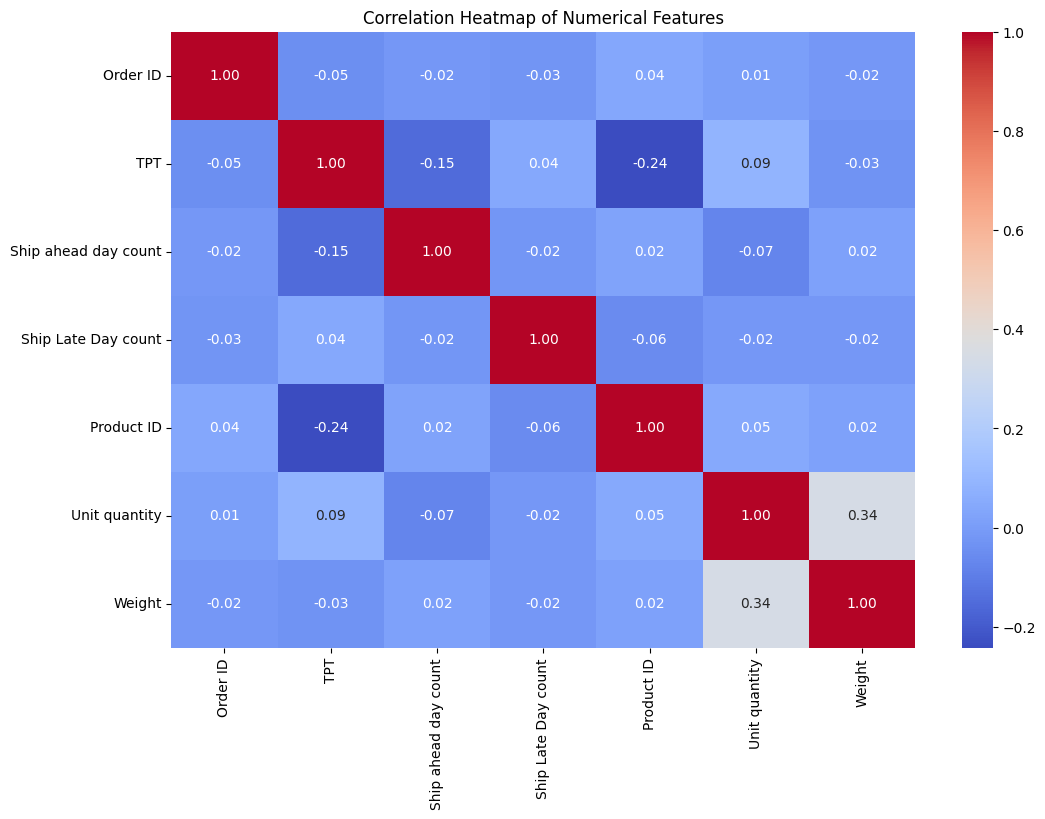

In [ ]:
# Step 4: Visualization 3 - Heatmap: Correlation between Numerical Features
# Select only numeric columns for correlation
numeric_cols = order_list_df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
correlation = numeric_cols.corr()  # Calculate correlation only on numeric columns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


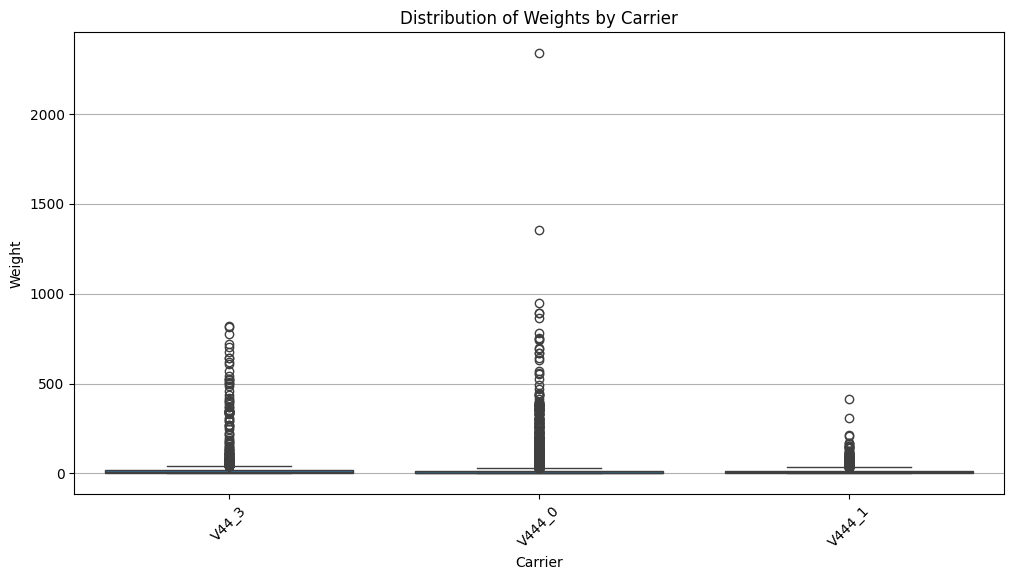

In [ ]:
# Step 5: Visualization 4 - Box Plot: Distribution of Weights by Carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='Carrier', y='Weight', data=order_list_df)
plt.title('Distribution of Weights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-47-f5f09298bc41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list_df, x='Plant Code', order=order_list_df['Plant Code'].value_counts().index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/sea

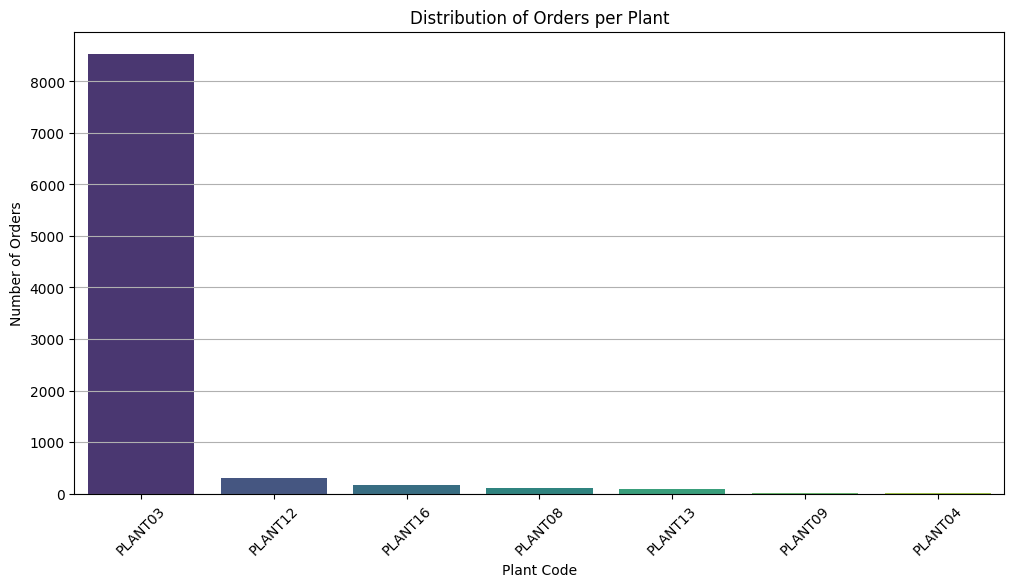

In [ ]:
# Step 2: Visualization 5 - Count Plot: Distribution of Orders per Plant
plt.figure(figsize=(12, 6))
sns.countplot(data=order_list_df, x='Plant Code', order=order_list_df['Plant Code'].value_counts().index, palette='viridis')
plt.title('Distribution of Orders per Plant')
plt.xlabel('Plant Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

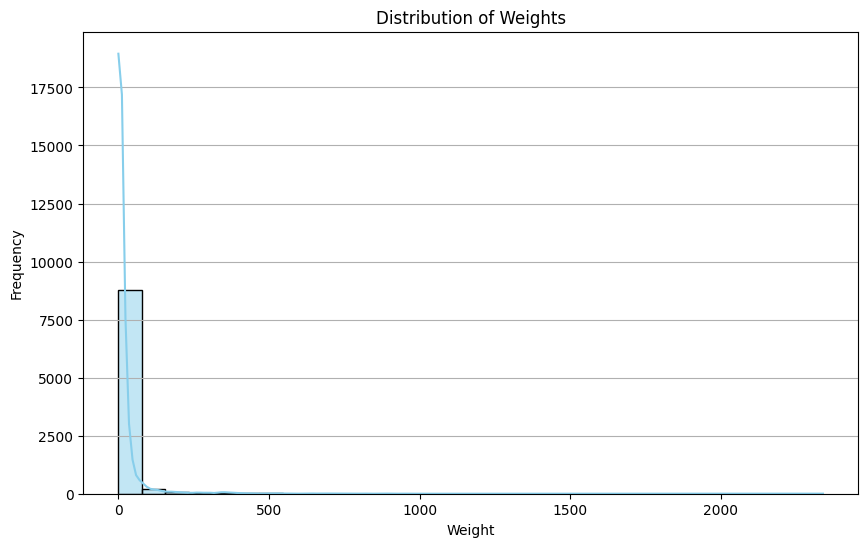

In [ ]:
# Step 3: Visualization 6 - Histogram: Distribution of Weights
plt.figure(figsize=(10, 6))
sns.histplot(order_list_df['Weight'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

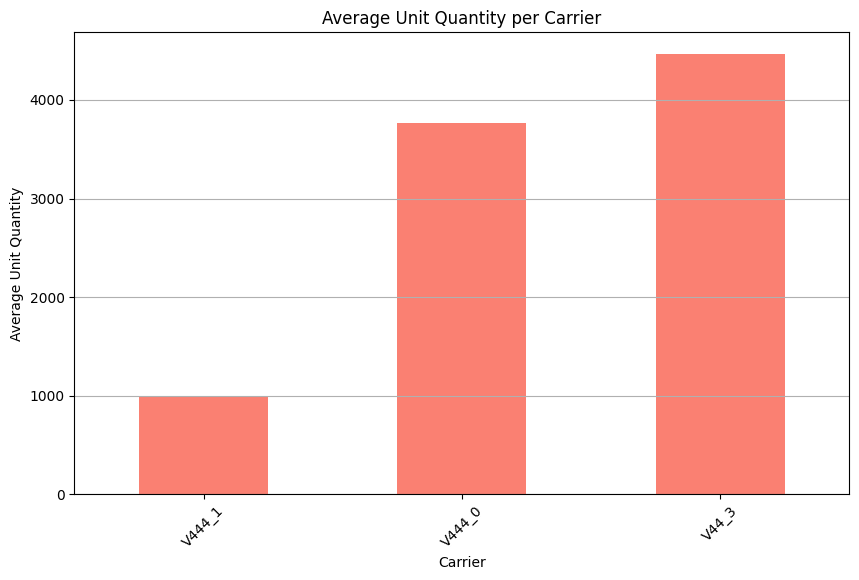

In [ ]:
# Step 4: Visualization 7 - Bar Plot: Average Unit Quantity per Carrier
plt.figure(figsize=(10, 6))
avg_unit_quantity = order_list_df.groupby('Carrier')['Unit quantity'].mean().sort_values()
avg_unit_quantity.plot(kind='bar', color='salmon')
plt.title('Average Unit Quantity per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Unit Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


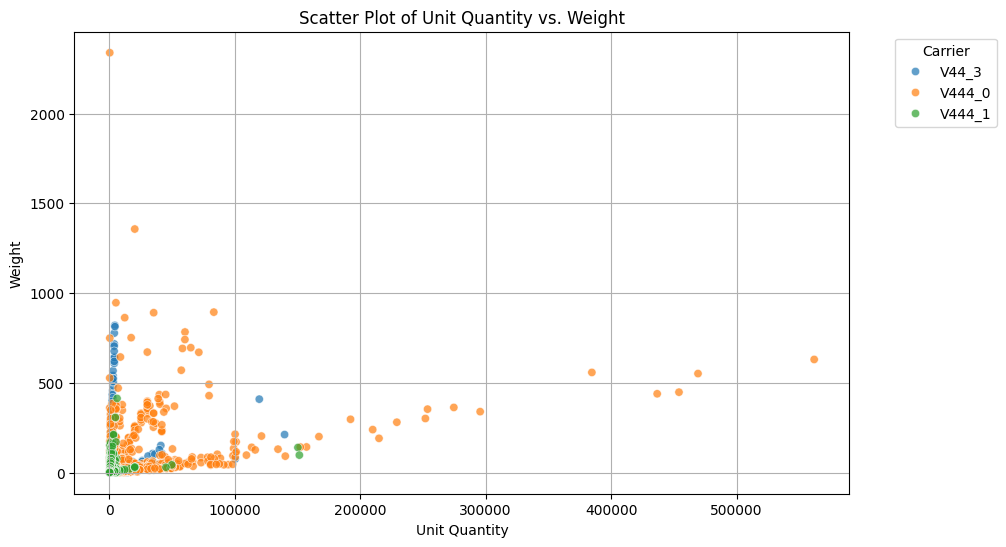

In [ ]:
# Step 5: Visualization 8 - Scatter Plot: Unit Quantity vs. Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_list_df, x='Unit quantity', y='Weight', hue='Carrier', alpha=0.7)
plt.title('Scatter Plot of Unit Quantity vs. Weight')
plt.xlabel('Unit Quantity')
plt.ylabel('Weight')
plt.grid(True)
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

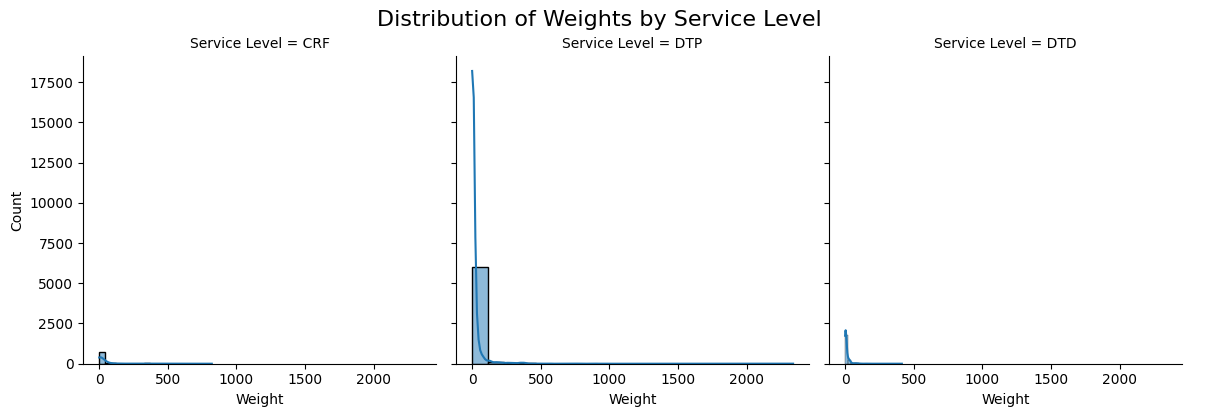

In [ ]:
# Step 6: Visualization 9 - Facet Grid: Distribution of Weights by Service Level
g = sns.FacetGrid(order_list_df, col="Service Level", height=4, aspect=1)
g.map(sns.histplot, "Weight", bins=20, kde=True)
g.add_legend()
g.fig.suptitle('Distribution of Weights by Service Level', fontsize=16, y=1.03)
plt.show()


# SOME MORE PROBLEM STATEMENTS

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Excel file and extract relevant sheets
file_path = '/content/Supply chain logisitcs problem.xlsx'  # Adjust the file path as needed
xls = pd.ExcelFile(file_path)


# **Warehouse Costs (WHCosts)**

In [ ]:
# Load the WHCosts and OrderList sheets
whcosts_df = pd.read_excel(xls, sheet_name='WhCosts')
order_list_df = pd.read_excel(xls, sheet_name='OrderList')

In [ ]:
# Step 3: Inspect the column names for both dataframes
print("WHCosts columns: ", whcosts_df.columns)
print("OrderList columns: ", order_list_df.columns)

WHCosts columns:  Index(['WH', 'Cost/unit'], dtype='object')
OrderList columns:  Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


In [ ]:
# Step 4: Clean the column names by stripping any whitespace
whcosts_df.columns = whcosts_df.columns.str.strip()
order_list_df.columns = order_list_df.columns.str.strip()

In [ ]:
# Step 5: Rename 'WH' to 'Plant Code' in the WHCosts dataframe
whcosts_df.rename(columns={'WH': 'Plant Code'}, inplace=True)

In [ ]:
# Step 6: Summarize order volume for each plant
order_volume_df = order_list_df.groupby('Plant Code')['Unit quantity'].sum().reset_index()
order_volume_df.columns = ['Plant Code', 'Total Order Volume']

In [ ]:
# Step 7: Merge WHCosts with order volume data for comparison
combined_df = pd.merge(whcosts_df, order_volume_df, on='Plant Code', how='left')


In [ ]:
# Step 8: Calculate cost efficiency as cost per unit / total order volume
combined_df['Cost Efficiency'] = combined_df['Cost/unit'] / combined_df['Total Order Volume']


In [ ]:
# Step 9: Identify plants with high costs but low volume
# Sort plants by Cost Efficiency (higher values indicate less efficient plants)
inefficient_plants = combined_df.sort_values(by='Cost Efficiency', ascending=False)


<ipython-input-79-1f73f36fcecd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

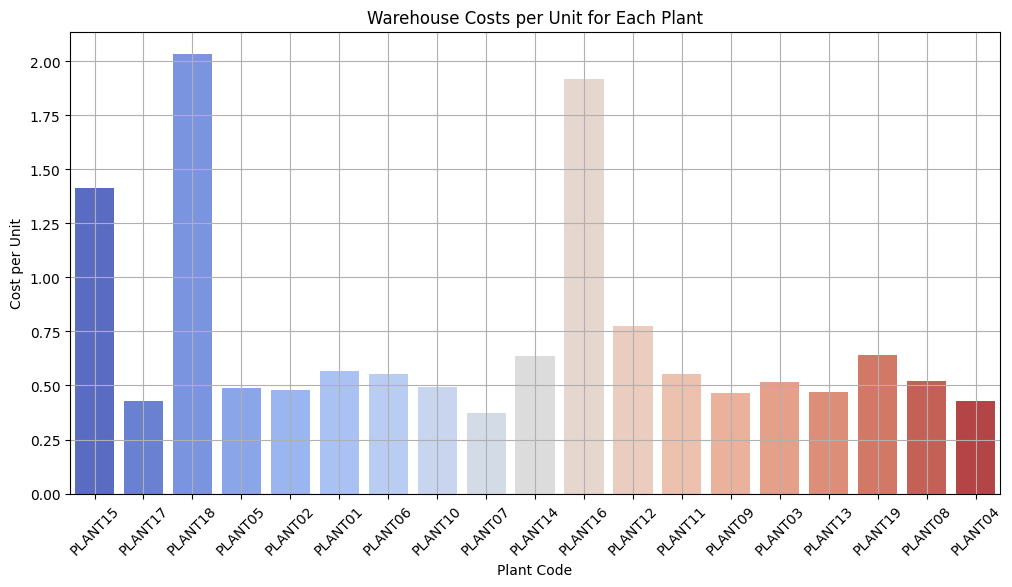

In [ ]:
# Step 10: Plot the WHCosts per unit for each plant
plt.figure(figsize=(12, 6))
sns.barplot(x='Plant Code', y='Cost/unit', data=combined_df, palette='coolwarm')
plt.title('Warehouse Costs per Unit for Each Plant')
plt.xlabel('Plant Code')
plt.ylabel('Cost per Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

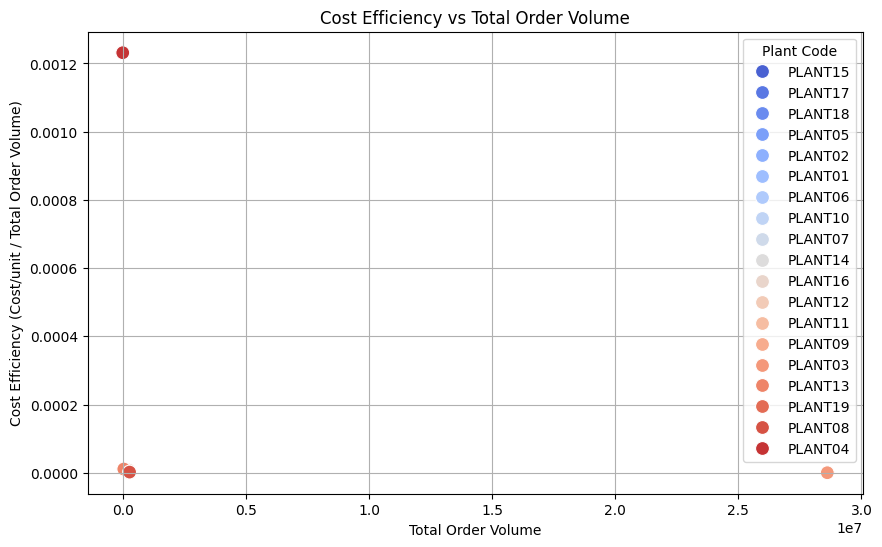

In [ ]:
# Step 11: Scatter plot of Cost Efficiency vs Total Order Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Order Volume', y='Cost Efficiency', data=combined_df, hue='Plant Code', palette='coolwarm', s=100)
plt.title('Cost Efficiency vs Total Order Volume')
plt.xlabel('Total Order Volume')
plt.ylabel('Cost Efficiency (Cost/unit / Total Order Volume)')
plt.grid(True)
plt.show()


In [ ]:
# Step 12: Identify and print inefficient plants for further analysis
print("Inefficient Plants (high cost/unit, low order volume):")
print(inefficient_plants[['Plant Code', 'Cost/unit', 'Total Order Volume', 'Cost Efficiency']])


Inefficient Plants (high cost/unit, low order volume):
   Plant Code  Cost/unit  Total Order Volume  Cost Efficiency
18    PLANT04   0.428503               348.0     1.231331e-03
15    PLANT13   0.469707             43379.0     1.082798e-05
10    PLANT16   1.919808            245133.0     7.831698e-06
11    PLANT12   0.773132            112000.0     6.902962e-06
13    PLANT09   0.465071            223830.0     2.077787e-06
17    PLANT08   0.522857            277008.0     1.887517e-06
14    PLANT03   0.517502          28611617.0     1.808712e-08
0     PLANT15   1.415063                 NaN              NaN
1     PLANT17   0.428947                 NaN              NaN
2     PLANT18   2.036254                 NaN              NaN
3     PLANT05   0.488144                 NaN              NaN
4     PLANT02   0.477504                 NaN              NaN
5     PLANT01   0.566976                 NaN              NaN
6     PLANT06   0.554088                 NaN              NaN
7     PLANT10  

In [ ]:
# Customer-Plant Mapping

# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Step 2: Load the Excel file and check the sheet names
file_path = '/content/Supply chain logisitcs problem.xlsx'  # Adjust the file path as needed
xls = pd.ExcelFile(file_path)

# Check available sheet names
print("Available sheet names:", xls.sheet_names)

# Step 3: Load the data from the correct sheets (after verifying the names)
# Adjust the sheet names based on what you see from the print output
customer_plant_df = pd.read_excel(xls, sheet_name='WhCapacities')  # Update this if the sheet name differs
plant_capacity_df = pd.read_excel(xls, sheet_name='')          # Update this if the sheet name differs
plant_location_df = pd.read_excel(xls, sheet_name='Plant_Location')          # Update this if the sheet name differs
customer_location_df = pd.read_excel(xls, sheet_name='Customer_Location')    # Update this if the sheet name differs


# Step 3: Clean the data by stripping whitespace from columns
customer_plant_df.columns = customer_plant_df.columns.str.strip()
plant_capacity_df.columns = plant_capacity_df.columns.str.strip()
plant_location_df.columns = plant_location_df.columns.str.strip()
customer_location_df.columns = customer_location_df.columns.str.strip()

# Step 4: Merge customer-plant data with capacity data
combined_df = pd.merge(customer_plant_df, plant_capacity_df, on='Plant Code', how='left')

# Step 5: Visualize Plant Capacity
plt.figure(figsize=(12, 6))
sns.barplot(x='Plant Code', y='Capacity', data=combined_df, palette='coolwarm')
plt.title('Plant Capacity for Each Plant')
plt.xlabel('Plant Code')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 6: Customer Clustering - Geographical proximity analysis (assuming lat/long are available)
customer_location_df['Coordinates'] = list(zip(customer_location_df['Latitude'], customer_location_df['Longitude']))
plant_location_df['Coordinates'] = list(zip(plant_location_df['Latitude'], plant_location_df['Longitude']))

# Step 7: Create a Network Graph of Customer-Plant connections with weights based on efficiency
G = nx.Graph()

# Adding plant nodes
for index, row in plant_location_df.iterrows():
    G.add_node(row['Plant Code'], pos=row['Coordinates'], node_type='Plant')

# Adding customer nodes and connecting them to the


Available sheet names: ['OrderList', 'FreightRates', 'WhCosts', 'WhCapacities', 'ProductsPerPlant', 'VmiCustomers', 'PlantPorts']


ValueError: Worksheet named 'Plant_Capacity' not found

# **PLANT CAPACITITES**

In [ ]:
# Load specific sheets into dataframes
order_list_df = pd.read_excel(xls, sheet_name='OrderList')
plant_capacity_df = pd.read_excel(xls, sheet_name='WhCapacities')

In [ ]:
# Step 1: Preprocessing OrderList to calculate actual plant usage
# Summing the Unit quantity per plant to determine total order volume per plant
order_volume_df = order_list_df.groupby('Plant Code')['Unit quantity'].sum().reset_index()
order_volume_df.columns = ['Plant Code', 'Total Order Volume']
# Step 1: Preprocessing OrderList to calculate actual plant usage
# Summing the Unit quantity per plant to determine total order volume per plant
order_volume_df = order_list_df.groupby('Plant Code')['Unit quantity'].sum().reset_index()
order_volume_df.columns = ['Plant Code', 'Total Order Volume']


In [ ]:
# Step 2: Merge with plant capacities
plant_capacity_df.columns = ['Plant Code', 'Daily Capacity']  # Renaming columns for consistency
merged_df = pd.merge(plant_capacity_df, order_volume_df, on='Plant Code', how='left')

In [ ]:
# Fill NaN values with 0 for plants with no orders
merged_df['Total Order Volume'].fillna(0, inplace=True)

<ipython-input-86-8da04611dc7b>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# Step 3: Calculate Capacity Utilization (Actual Usage / Daily Capacity)
merged_df['Capacity Utilization (%)'] = (merged_df['Total Order Volume'] / merged_df['Daily Capacity']) * 100


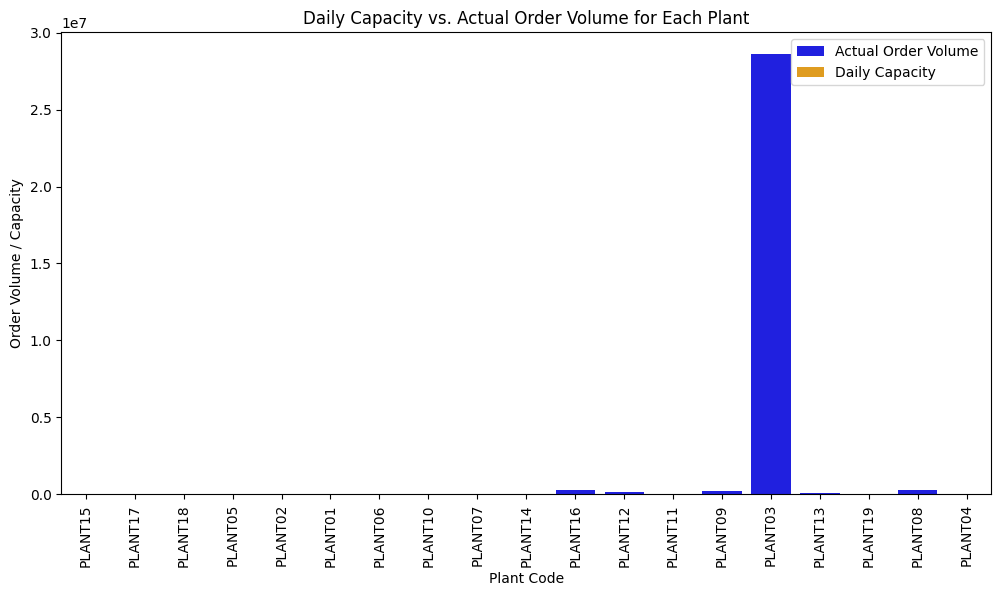

In [ ]:
# Visualization 1: Bar chart of daily capacity vs. actual order volume for each plant
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='Plant Code', y='Total Order Volume', color='blue', label='Actual Order Volume')
sns.barplot(data=merged_df, x='Plant Code', y='Daily Capacity', color='orange', label='Daily Capacity')

plt.title('Daily Capacity vs. Actual Order Volume for Each Plant')
plt.ylabel('Order Volume / Capacity')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Visualization 2: Gantt Chart for Plant Utilization Over Time
# Assuming you have a date-related column in your order_list_df ('Order Date') to create a Gantt chart
order_list_df['Order Date'] = pd.to_datetime(order_list_df['Order Date'])

# Create a Gantt chart using Plotly
gantt_chart_data = order_list_df.groupby(['Plant Code', 'Order Date']).agg({'Unit quantity': 'sum'}).reset_index()

fig = px.timeline(gantt_chart_data, x_start='Order Date', x_end='Order Date', y='Plant Code',
                  color='Unit quantity', title='Plant Utilization Over Time')
fig.update_yaxes(categoryorder="total ascending")
fig.show()

In [ ]:
# Step 5: Analysis & Insights
# Identify plants with over-capacity or underutilized plants
over_capacity = merged_df[merged_df['Capacity Utilization (%)'] > 100]
underutilized_plants = merged_df[merged_df['Capacity Utilization (%)'] < 50]

# Display over-capacity
print("Plants Over Capacity:")
print(over_capacity[['Plant Code', 'Capacity Utilization (%)']])

# Display underutilized plants
print("\nUnderutilized Plants (Capacity Utilization < 50%):")
print(underutilized_plants[['Plant Code', 'Capacity Utilization (%)']])

Plants Over Capacity:
   Plant Code  Capacity Utilization (%)
10    PLANT16              5.363961e+04
11    PLANT12              5.358852e+04
13    PLANT09              2.034818e+06
14    PLANT03              2.824444e+06
15    PLANT13              8.852857e+03
17    PLANT08              1.978629e+06

Underutilized Plants (Capacity Utilization < 50%):
   Plant Code  Capacity Utilization (%)
0     PLANT15                       0.0
1     PLANT17                       0.0
2     PLANT18                       0.0
3     PLANT05                       0.0
4     PLANT02                       0.0
5     PLANT01                       0.0
6     PLANT06                       0.0
7     PLANT10                       0.0
8     PLANT07                       0.0
9     PLANT14                       0.0
12    PLANT11                       0.0
16    PLANT19                       0.0


# **Product Mapping**

In [ ]:
# Step 1: Load data from the relevant sheets
product_mapping_df = pd.read_excel(xls, sheet_name='ProductsPerPlant')  # Assuming this sheet exists

In [ ]:
# Step 2: Data Cleaning (Check column names and clean data if necessary)
print("Columns in Product_Plant_Mapping:", product_mapping_df.columns)

# If necessary, rename columns to match the expected format
product_mapping_df.rename(columns={
    'Plant Code': 'Plant_Code',
    'Product ID': 'Product_ID',
}, inplace=True)

Columns in Product_Plant_Mapping: Index(['Plant Code', 'Product ID'], dtype='object')


In [ ]:
# Step 3: Analyze Product Concentration per Plant
# Count the number of unique products per plant
product_counts_per_plant = product_mapping_df.groupby('Plant_Code')['Product_ID'].nunique().reset_index()
product_counts_per_plant.columns = ['Plant_Code', 'Unique_Product_Count']


<ipython-input-96-49079f4fad0c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

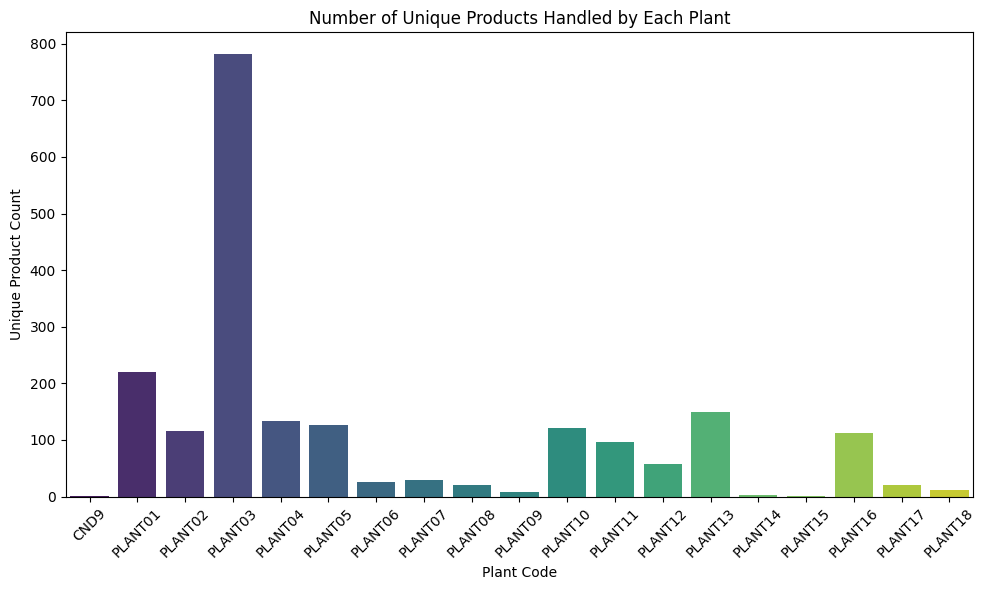

In [ ]:
# Step 4: Visualize Product Concentration - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Plant_Code', y='Unique_Product_Count', data=product_counts_per_plant, palette='viridis')
plt.title('Number of Unique Products Handled by Each Plant')
plt.xlabel('Plant Code')
plt.ylabel('Unique Product Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

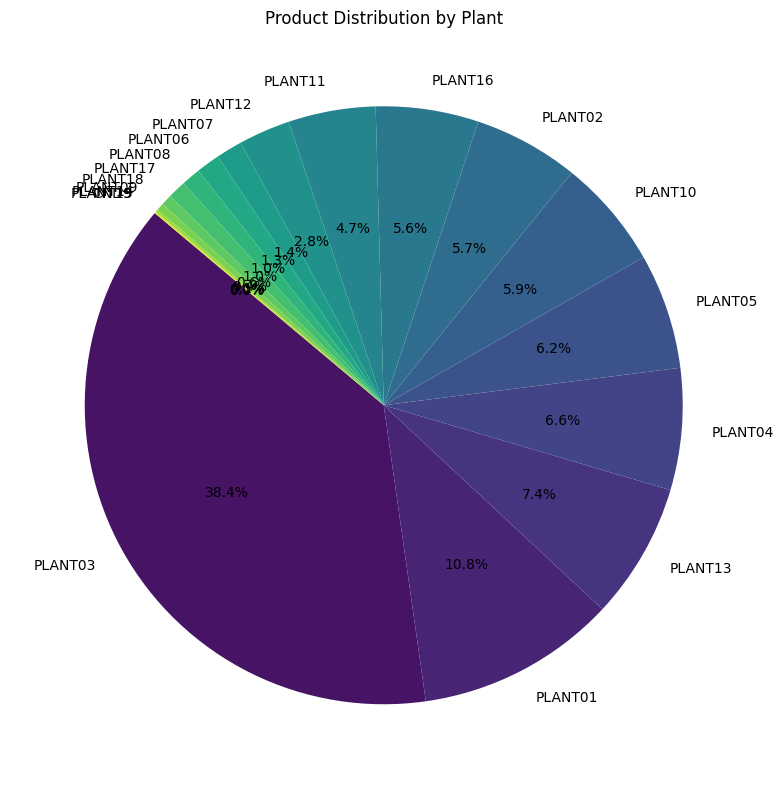

In [ ]:
# Step 5: Visualize Product Distribution - Pie Chart
product_distribution = product_mapping_df['Plant_Code'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(product_distribution, labels=product_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(product_distribution)))
plt.title('Product Distribution by Plant')
plt.tight_layout()
plt.show()

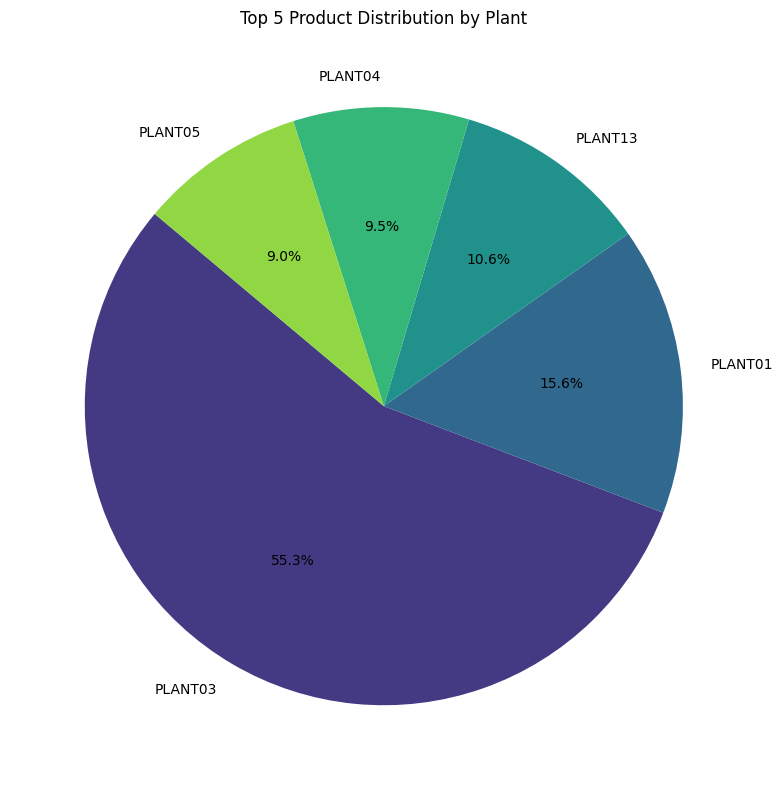

In [ ]:
product_distribution = product_mapping_df['Plant_Code'].value_counts()

# Get the top 5 products
top_products = product_distribution.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_products)))
plt.title('Top 5 Product Distribution by Plant')
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Analyze whether certain products are sourced from specific plants
# Count total products per plant and visualize
total_products_per_plant = product_mapping_df['Plant_Code'].value_counts().reset_index()
total_products_per_plant.columns = ['Plant_Code', 'Product_Count']

print(total_products_per_plant)

   Plant_Code  Product_Count
0     PLANT03            781
1     PLANT01            220
2     PLANT13            150
3     PLANT04            134
4     PLANT05            127
5     PLANT10            121
6     PLANT02            116
7     PLANT16            113
8     PLANT11             96
9     PLANT12             57
10    PLANT07             29
11    PLANT06             26
12    PLANT08             21
13    PLANT17             20
14    PLANT18             12
15    PLANT09              8
16    PLANT14              3
17    PLANT15              1
18       CND9              1


In [ ]:
# Step 7: Identify if certain plants are handling a disproportionate share of products
# You can add thresholds or further analysis to check for bottlenecks based on this data
overloaded_plants = total_products_per_plant[total_products_per_plant['Product_Count'] > total_products_per_plant['Product_Count'].mean()]

print("Overloaded Plants (handling more than average products):")
print(overloaded_plants)


Overloaded Plants (handling more than average products):
  Plant_Code  Product_Count
0    PLANT03            781
1    PLANT01            220
2    PLANT13            150
3    PLANT04            134
4    PLANT05            127
5    PLANT10            121
6    PLANT02            116
7    PLANT16            113


# **PORT MAPPING**

Plant-Port Mapping Columns: Index(['Plant Code', 'Port'], dtype='object')
Order List Columns: Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


<ipython-input-21-4c1e76ccd63e>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

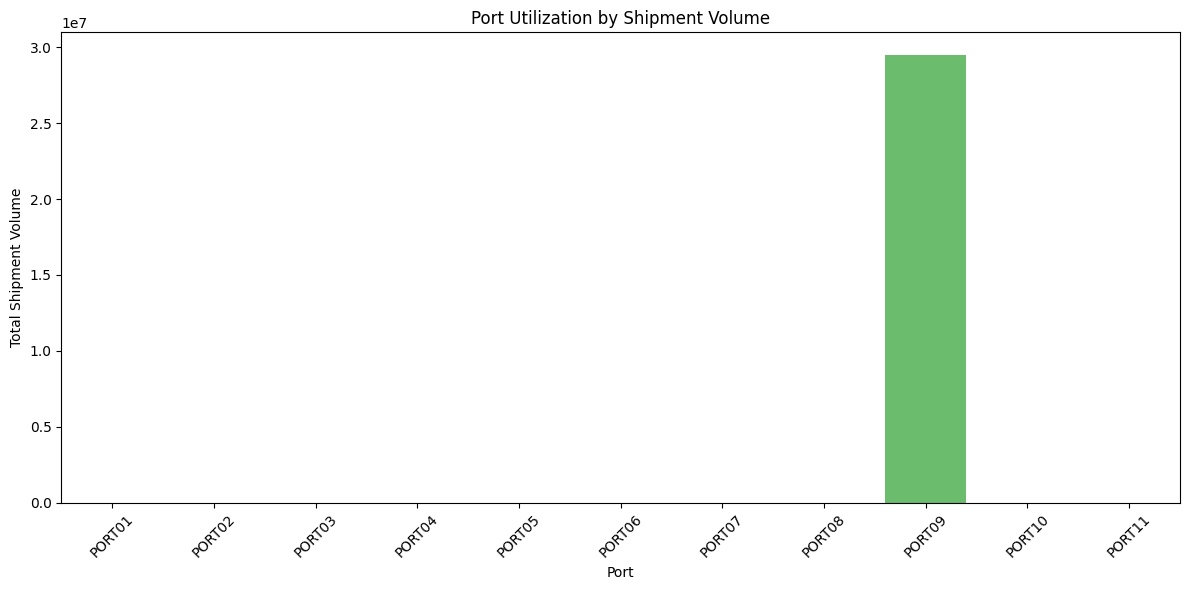

Over-utilized ports:
Empty DataFrame
Columns: [Plant Code, Port, Destination Port, Total Shipments]
Index: []
Under-utilized ports:
Empty DataFrame
Columns: [Plant Code, Port, Destination Port, Total Shipments]
Index: []


In [ ]:
# Load relevant sheets
plant_port_df = pd.read_excel(xls, sheet_name='PlantPorts')  # Replace with actual sheet name
order_list_df = pd.read_excel(xls, sheet_name='OrderList')  # Replace with actual sheet name if different

# Check the structure of loaded data
print("Plant-Port Mapping Columns:", plant_port_df.columns)
print("Order List Columns:", order_list_df.columns)

# Step 2: Data processing and analysis
# Assuming the 'plant_port_df' contains columns like ['Plant Code', 'Port Code']
# and the 'order_list_df' contains columns like ['Plant Code', 'Destination Port', 'Unit quantity']

# Aggregate the shipment volume by Port
# Assuming 'Destination Port' contains the port information in order_list_df
port_shipments = order_list_df.groupby('Destination Port')['Unit quantity'].sum().reset_index()
port_shipments.rename(columns={'Unit quantity': 'Total Shipments'}, inplace=True)

# Merge the port shipment data with plant-port mapping data
plant_port_shipments = pd.merge(plant_port_df, port_shipments, left_on='Port', right_on='Destination Port', how='left')

# Step 3: Visualization 1 - Port Utilization Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plant_port_shipments, x='Port', y='Total Shipments', palette='viridis')
plt.title('Port Utilization by Shipment Volume')
plt.xlabel('Port')
plt.ylabel('Total Shipment Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Visualization 2 - Geographical Map of Plants, Ports, and Shipments
# Check if we have geographical coordinates for ports and plants in 'plant_port_df'
# Assuming plant_port_df has columns like ['Plant Code', 'Port Code', 'Latitude', 'Longitude']

# For example, if we have coordinates, we can plot like this:
# Uncomment the following lines if you have coordinates in your DataFrame

# Create a GeoDataFrame for mapping
# gdf_ports = gpd.GeoDataFrame(port_shipments, geometry=gpd.points_from_xy(plant_port_df['Longitude'], plant_port_df['Latitude']))

# Assuming you have a base map file (like a shapefile) to plot against
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the base map and overlay plant and port locations
# ax = world.plot(figsize=(12, 8))
# gdf_ports.plot(ax=ax, color='red', marker='o', markersize=5)
# plt.title('Geographical Map of Plants, Ports, and Shipments')
# plt.show()

# Note: The map requires proper geographical data; you can use dummy coordinates for testing or skip the map plot.

# Step 5: Insights based on analysis
# Analyze port congestion
mean_shipments = plant_port_shipments['Total Shipments'].mean()
over_utilized_ports = plant_port_shipments[plant_port_shipments['Total Shipments'] > mean_shipments]
under_utilized_ports = plant_port_shipments[plant_port_shipments['Total Shipments'] < mean_shipments]

print("Over-utilized ports:")
print(over_utilized_ports)

print("Under-utilized ports:")
print(under_utilized_ports)


In [ ]:
# Load relevant sheets
plant_port_df = pd.read_excel(xls, sheet_name='PlantPorts')
order_list_df = pd.read_excel(xls, sheet_name='OrderList')

# Check the structure of loaded data
print("Plant-Port Mapping Columns:", plant_port_df.columns)
print("Order List Columns:", order_list_df.columns)


Plant-Port Mapping Columns: Index(['Plant Code', 'Port'], dtype='object')
Order List Columns: Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


In [ ]:
port_shipments = order_list_df.groupby('Destination Port')['Unit quantity'].sum().reset_index()
port_shipments.rename(columns={'Unit quantity': 'Total Shipments'}, inplace=True)

In [ ]:
# Merge the port shipment data with plant-port mapping data
plant_port_shipments = pd.merge(plant_port_df, port_shipments, left_on='Port', right_on='Destination Port', how='left')

<ipython-input-114-cf6651e2be7a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

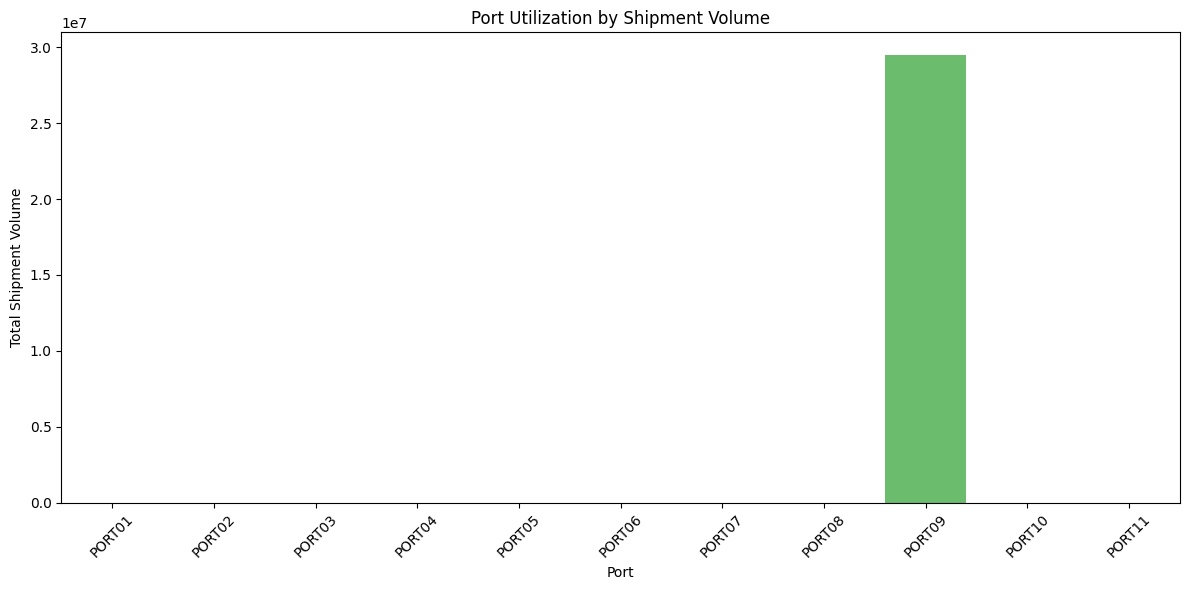

In [ ]:
# Step 3: Visualization 1 - Port Utilization Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plant_port_shipments, x='Port', y='Total Shipments', palette='viridis')
plt.title('Port Utilization by Shipment Volume')
plt.xlabel('Port')
plt.ylabel('Total Shipment Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Insights based on analysis
# Analyze port congestion
mean_shipments = plant_port_shipments['Total Shipments'].mean()
over_utilized_ports = plant_port_shipments[plant_port_shipments['Total Shipments'] > mean_shipments]
under_utilized_ports = plant_port_shipments[plant_port_shipments['Total Shipments'] < mean_shipments]

print("Over-utilized ports:")
print(over_utilized_ports)

print("Under-utilized ports:")
print(under_utilized_ports)

Over-utilized ports:
Empty DataFrame
Columns: [Plant Code, Port, Destination Port, Total Shipments]
Index: []
Under-utilized ports:
Empty DataFrame
Columns: [Plant Code, Port, Destination Port, Total Shipments]
Index: []


In [ ]:
# Combining All data source

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data from the Excel file
file_path = '/content/Supply chain logisitcs problem.xlsx'  # Path to the Excel file
xls = pd.ExcelFile(file_path)

# Load relevant sheets
order_list_df = pd.read_excel(xls, sheet_name='OrderList')  # Replace with actual sheet name if different
wh_costs_df = pd.read_excel(xls, sheet_name='WhCosts')  # Warehousing costs
plant_capacity_df = pd.read_excel(xls, sheet_name='WhCapacities')  # Plant capacities
shipping_costs_df = pd.read_excel(xls, sheet_name='')  # Shipping costs
customer_plant_mapping_df = pd.read_excel(xls, sheet_name='VmiCustomers')  # Customer-Plant Mapping

# Step 2: Data processing
# Assume 'Shipping_Costs' contains 'Carrier', 'Port', and 'Cost' for shipping
# Calculate total shipping costs for each order based on the carrier used

# Join order data with shipping costs
order_cost_df = pd.merge(order_list_df, shipping_costs_df, how='left', on=['Carrier', 'Destination Port'])

# Calculate total costs as sum of warehousing, shipping costs, and costs based on plant capacities
order_cost_df = pd.merge(order_cost_df, wh_costs_df, how='left', left_on='Plant Code', right_on='WH')
order_cost_df = pd.merge(order_cost_df, plant_capacity_df, how='left', on='Plant Code')

# Calculate total cost per order
order_cost_df['Total Cost'] = order_cost_df['Cost/unit'] + order_cost_df['Shipping Cost']  # Adjust based on actual columns

# Step 3: Analyze total costs and delivery speed
# Analyze total cost per customer
total_cost_per_customer = order_cost_df.groupby('Customer')['Total Cost'].sum().reset_index()

# Analyze average delivery time by combining relevant columns from order_cost_df
average_delivery_time = order_cost_df.groupby('Destination Port')['TPT'].mean().reset_index()  # 'TPT' is assumed delivery time

# Step 4: Visualization 1 - Heatmap of Total Costs
plt.figure(figsize=(12, 8))
heatmap_data = order_cost_df.pivot_table(index='Plant Code', columns='Destination Port', values='Total Cost', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Total Costs by Plant and Port')
plt.xlabel('Destination Port')
plt.ylabel('Plant Code')
plt.tight_layout()
plt.show()

# Step 5: Visualization 2 - Supply Chain Flow Diagram
# Here, you could use a library like NetworkX or Plotly for flow diagrams
# For simplicity, we can show a basic scatter plot representing the flow

plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_cost_df, x='Plant Code', y='Destination Port', size='Total Cost', sizes=(20, 500), alpha=0.5)
plt.title('Supply Chain Flow: Plant to Port by Total Cost')
plt.xlabel('Plant Code')
plt.ylabel('Destination Port')
plt.legend(title='Total Cost')
plt.show()

# Insights
print("Total Costs per Customer:")
print(total_cost_per_customer)

print("Average Delivery Time by Port:")
print(average_delivery_time)


NameError: name 'order_cost_df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the Excel file
file_path = '/content/Supply chain logisitcs problem.xlsx'  # Path to the Excel file
xls = pd.ExcelFile(file_path)

# Load relevant sheets
order_list_df = pd.read_excel(xls, sheet_name='OrderList')  # Order data
wh_costs_df = pd.read_excel(xls, sheet_name='WhCosts')  # Warehousing costs
plant_capacity_df = pd.read_excel(xls, sheet_name='WhCapacities')  # Plant capacities
customer_plant_mapping_df = pd.read_excel(xls, sheet_name='VmiCustomers')  # Customer-Plant Mapping

# Step 1: Data Preprocessing
# Merge Order Data with Warehousing Costs
merged_df = pd.merge(order_list_df, wh_costs_df, how='left', left_on='Plant Code', right_on='WH')

# Merge with Plant Capacity
merged_df = pd.merge(merged_df, plant_capacity_df, how='left', left_on='Plant Code', right_on='Plant ID')

# Rename the 'Daily Capacity' column to avoid conflicts
merged_df = merged_df.rename(columns={'Daily Capacity': 'Daily Capacity'})

# Step 2: Capacity Utilization Analysis
# Calculate daily capacities and actual usage
capacity_utilization = merged_df.groupby('OrderList').agg(
    total_capacity=('Daily Capacity', 'sum'),
    total_orders=('Unit quantity', 'sum')
).reset_index()

# Step 3: Visualization - Bar chart of daily capacity vs. actual order volume for each plant
plt.figure(figsize=(12, 6))
sns.barplot(data=capacity_utilization, x='Plant Code', y='total_capacity', color='lightblue', label='Total Capacity')
sns.barplot(data=capacity_utilization, x='Plant Code', y='total_orders', color='salmon', label='Total Orders', alpha=0.7)
plt.title('Daily Capacity vs Actual Order Volume for Each Plant')
plt.xlabel('Plant Code')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Gantt Chart for Plant Utilization Over Time
# Create a Gantt chart if time series data is available
# This assumes you have a time column in your merged DataFrame

# Example Gantt Chart Code (modify based on actual columns)
# For simplicity, let's assume the time column is 'Order Date'
gantt_data = merged_df[['Order Date', 'Plant Code', 'Unit quantity']]
gantt_data['Order Date'] = pd.to_datetime(gantt_data['Order Date'])
gantt_data['End Date'] = gantt_data['Order Date'] + pd.to_timedelta(1, unit='D')  # Example: 1-day duration

# Plotting Gantt Chart
plt.figure(figsize=(12, 6))
for index, row in gantt_data.iterrows():
    plt.barh(row['Plant Code'], row['End Date'] - row['Order Date'], left=row['Order Date'].toordinal(), color='skyblue')

plt.title('Plant Utilization Over Time')
plt.xlabel('Date')
plt.ylabel('Plant Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Insights
print("Capacity Utilization Analysis:")
print(capacity_utilization)

# Further analysis and optimization code can be added below


KeyError: 'OrderList'